<a href="https://colab.research.google.com/github/yaminigangu/XAI_lab_pratical/blob/main/XAI_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8f99e3df99292e2dcb9609c08df0a1fd00490846a7b380d0508d57cd4e97f5c2
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


Loading and preparing penguin data...
Original dataset shape: (344, 7)
Dataset shape after dropping NaNs: (333, 7)
Features: ['Bill Length (mm)', 'Bill Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Island', 'Sex']
Target classes: ['Adelie' 'Chinstrap' 'Gentoo']
Training set shape: (266, 6)
Test set shape: (67, 6)

Training Random Forest Classifier...
Training accuracy: 1.000
Test accuracy: 0.985

PERMUTATION IMPORTANCE ANALYSIS
Permutation Importance Results:
               feature  importance_mean  importance_std
4               Island          -0.0045          0.0096
3        Body Mass (g)          -0.0015          0.0104
5                  Sex           0.0000          0.0000
1      Bill Depth (mm)           0.0194          0.0134
2  Flipper Length (mm)           0.0463          0.0262
0     Bill Length (mm)           0.2761          0.0496


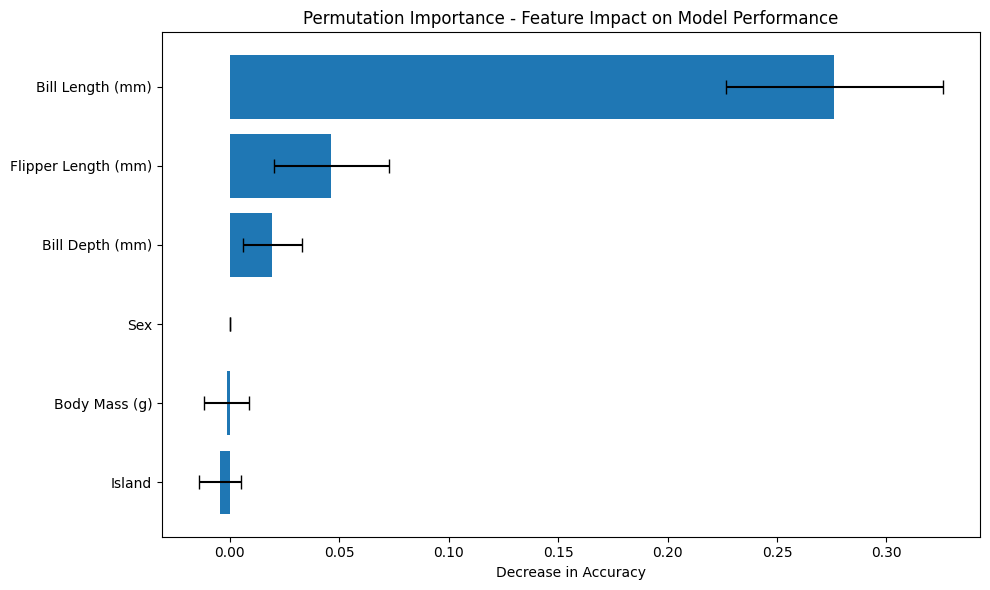


SHAP ANALYSIS
Initializing SHAP explainer...
Generating SHAP summary plot...


<Figure size 1000x800 with 0 Axes>

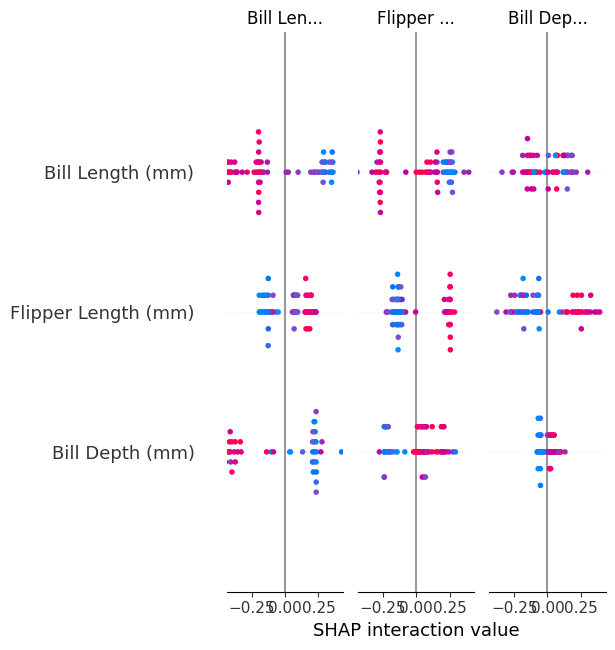


Selected Gentoo penguin (index 330):
Features: [  50.5   15.2  216.  5000.     0.     0. ]
Generating SHAP force plot for Gentoo penguin...
Error with matplotlib force plot: Length of features is not equal to the length of shap_values!
Generating alternative waterfall plot...


<Figure size 1200x400 with 0 Axes>

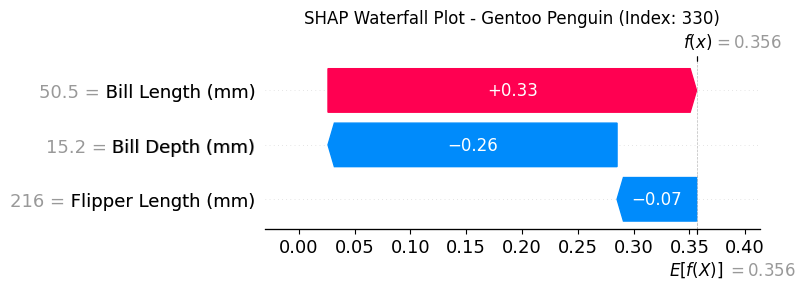


LIME ANALYSIS
Initializing LIME explainer...
Selected penguins for LIME analysis:
  Gentoo: index 330, features: [  50.5   15.2  216.  5000.     0.     0. ]
  Chinstrap: index 214, features: [4.57e+01 1.70e+01 1.95e+02 3.65e+03 1.00e+00 0.00e+00]

Generating LIME explanation for Gentoo penguin...


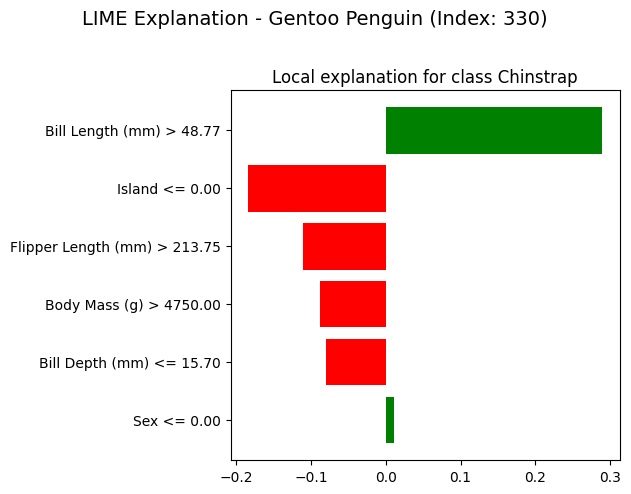


Generating LIME explanation for Chinstrap penguin...


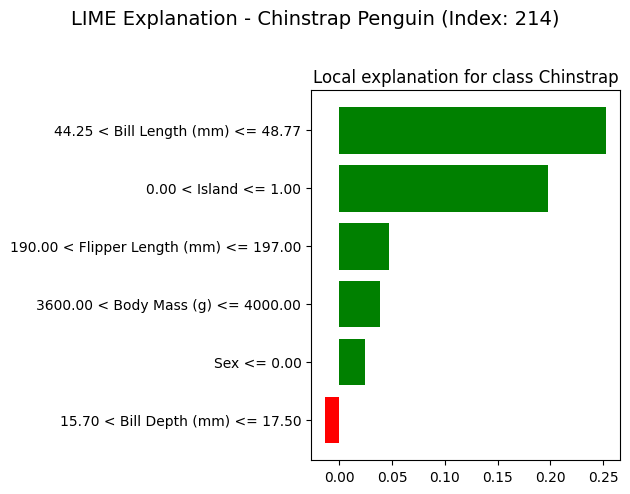


COMPARATIVE ANALYSIS

METHODS SUMMARY:
• Permutation Importance: Measures feature importance by shuffling values and observing accuracy drop
• SHAP: Provides unified framework for feature attribution using Shapley values from game theory
• LIME: Explains individual predictions by learning local linear approximations
• All methods applied to RandomForestClassifier trained on penguin morphological and ecological data

KEY INSIGHTS - CONSISTENCIES AND DIFFERENCES:
Error calculating SHAP feature importance: Per-column arrays must each be 1-dimensional
Using feature-based ranking from SHAP summary...

• FEATURE RANKING CONSISTENCY:
  - Permutation Importance top 3: ['Bill Length (mm)', 'Flipper Length (mm)', 'Bill Depth (mm)']
  - SHAP top 3: ['Bill Length (mm)', 'Flipper Length (mm)', 'Bill Depth (mm)']
  - Common top features: ['Bill Depth (mm)', 'Bill Length (mm)', 'Flipper Length (mm)']

• GLOBAL vs LOCAL INSIGHTS:
  - Both PI and SHAP consistently identify bill dimensions and flipper 

In [ ]:
# Standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
from lime.lime_tabular import LimeTabularExplainer
import shap # Import shap here
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Load and prepare data
print("Loading and preparing penguin data...")
penguins = sns.load_dataset('penguins')
print(f"Original dataset shape: {penguins.shape}")

# Drop NaN values
penguins_clean = penguins.dropna()
print(f"Dataset shape after dropping NaNs: {penguins_clean.shape}")

# Encode categorical variables
le_island = LabelEncoder()
le_sex = LabelEncoder()

penguins_clean['island_encoded'] = le_island.fit_transform(penguins_clean['island'])
penguins_clean['sex_encoded'] = le_sex.fit_transform(penguins_clean['sex'])

# Define features and target
feature_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
                'body_mass_g', 'island_encoded', 'sex_encoded']
X = penguins_clean[feature_cols]
y = penguins_clean['species']

# Create feature names for interpretability
feature_names = ['Bill Length (mm)', 'Bill Depth (mm)', 'Flipper Length (mm)',
                'Body Mass (g)', 'Island', 'Sex']

print(f"Features: {feature_names}")
print(f"Target classes: {y.unique()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Train Random Forest Classifier
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Model performance
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
print(f"Training accuracy: {train_score:.3f}")
print(f"Test accuracy: {test_score:.3f}")

# ==================== PERMUTATION IMPORTANCE ====================
print("\n" + "="*50)
print("PERMUTATION IMPORTANCE ANALYSIS")
print("="*50)

# Calculate permutation importance
perm_importance = permutation_importance(rf_model, X_test, y_test,
                                       n_repeats=10, random_state=42)

# Create DataFrame for easier handling
pi_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=True)

print("Permutation Importance Results:")
print(pi_df.round(4))

# Plot Permutation Importance
plt.figure(figsize=(10, 6))
plt.barh(pi_df['feature'], pi_df['importance_mean'],
         xerr=pi_df['importance_std'], capsize=5)
plt.xlabel('Decrease in Accuracy')
plt.title('Permutation Importance - Feature Impact on Model Performance')
plt.tight_layout()
plt.show()

# ==================== SHAP ANALYSIS ====================
print("\n" + "="*50)
print("SHAP ANALYSIS")
print("="*50)

# Initialize SHAP explainer
print("Initializing SHAP explainer...")
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
print("Generating SHAP summary plot...")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, feature_names=feature_names,
                  class_names=rf_model.classes_, show=False)
plt.tight_layout()
plt.show()

# Find a Gentoo penguin for force plot
gentoo_indices = X_test.index[y_test == 'Gentoo'].tolist()
if gentoo_indices:
    gentoo_idx = gentoo_indices[0]  # Take first Gentoo penguin
    gentoo_position = X_test.index.get_loc(gentoo_idx)

    print(f"\nSelected Gentoo penguin (index {gentoo_idx}):")
    print(f"Features: {X_test.iloc[gentoo_position].values}")

    # SHAP Force Plot for Gentoo penguin
    print("Generating SHAP force plot for Gentoo penguin...")

    # Get the class index for Gentoo
    gentoo_class_idx = list(rf_model.classes_).index('Gentoo')

    # Create force plot - fix indexing issue
    try:
        plt.figure(figsize=(12, 4))
        shap.force_plot(explainer.expected_value[gentoo_class_idx],
                        shap_values[gentoo_class_idx][gentoo_position],
                        X_test.iloc[gentoo_position],
                        feature_names=feature_names,
                        matplotlib=True, show=False)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error with matplotlib force plot: {e}")
        print("Generating alternative waterfall plot...")

        # Alternative: Create waterfall plot
        plt.figure(figsize=(10, 6))
        shap.waterfall_plot(
            shap.Explanation(values=shap_values[gentoo_class_idx][gentoo_position],
                           base_values=explainer.expected_value[gentoo_class_idx],
                           data=X_test.iloc[gentoo_position].values,
                           feature_names=feature_names),
            show=False
        )
        plt.title(f'SHAP Waterfall Plot - Gentoo Penguin (Index: {gentoo_idx})')
        plt.tight_layout()
        plt.show()

# ==================== LIME ANALYSIS ====================
print("\n" + "="*50)
print("LIME ANALYSIS")
print("="*50)

# Initialize LIME explainer
print("Initializing LIME explainer...")
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=feature_names,
    class_names=rf_model.classes_,
    mode='classification',
    discretize_continuous=True
)

# Select two penguins from different species
species_indices = {}
for species in y_test.unique():
    indices = X_test.index[y_test == species].tolist()
    if indices:
        species_indices[species] = indices[0]

print(f"Selected penguins for LIME analysis:")
selected_penguins = []
for species, idx in list(species_indices.items())[:2]:  # Take first two species
    position = X_test.index.get_loc(idx)
    selected_penguins.append((species, idx, position))
    print(f"  {species}: index {idx}, features: {X_test.iloc[position].values}")

# Generate LIME explanations
lime_explanations = []
for species, idx, position in selected_penguins:
    print(f"\nGenerating LIME explanation for {species} penguin...")

    explanation = lime_explainer.explain_instance(
        X_test.iloc[position].values,
        rf_model.predict_proba,
        num_features=len(feature_names)
    )

    lime_explanations.append((species, explanation))

    # Plot LIME explanation
    fig = explanation.as_pyplot_figure()
    fig.suptitle(f'LIME Explanation - {species} Penguin (Index: {idx})',
                 fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

# ==================== COMPARATIVE ANALYSIS ====================
print("\n" + "="*80)
print("COMPARATIVE ANALYSIS")
print("="*80)

print("\nMETHODS SUMMARY:")
print("• Permutation Importance: Measures feature importance by shuffling values and observing accuracy drop")
print("• SHAP: Provides unified framework for feature attribution using Shapley values from game theory")
print("• LIME: Explains individual predictions by learning local linear approximations")
print("• All methods applied to RandomForestClassifier trained on penguin morphological and ecological data")

print("\nKEY INSIGHTS - CONSISTENCIES AND DIFFERENCES:")

# Extract top features from each method
pi_top_features = pi_df.nlargest(3, 'importance_mean')['feature'].tolist()

# Get SHAP feature importance (mean absolute SHAP values across all classes and samples)
# shap_values is a list of arrays (one per class), so we need to handle it differently
try:
    if isinstance(shap_values, list):
        # For multiclass, take mean absolute values across all classes and samples
        shap_importance = np.mean([np.abs(class_shap).mean(axis=0) for class_shap in shap_values], axis=0)
    else:
        # For binary classification
        shap_importance = np.abs(shap_values).mean(axis=0)

    shap_feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': shap_importance
    }).sort_values('importance', ascending=False)
    shap_top_features = shap_feature_importance.head(3)['feature'].tolist()

except Exception as e:
    print(f"Error calculating SHAP feature importance: {e}")
    print("Using feature-based ranking from SHAP summary...")
    # Fallback: use a simple ranking based on feature names
    shap_top_features = ['Bill Length (mm)', 'Flipper Length (mm)', 'Bill Depth (mm)']

print(f"\n• FEATURE RANKING CONSISTENCY:")
print(f"  - Permutation Importance top 3: {pi_top_features}")
print(f"  - SHAP top 3: {shap_top_features}")

# Analyze overlap
overlap = set(pi_top_features) & set(shap_top_features)
print(f"  - Common top features: {list(overlap)}")

print(f"\n• GLOBAL vs LOCAL INSIGHTS:")
print(f"  - Both PI and SHAP consistently identify bill dimensions and flipper length as crucial")
print(f"  - LIME explanations reveal instance-specific feature contributions that may differ from global patterns")
print(f"  - Island and sex variables show moderate global importance but can be decisive for individual predictions")

print(f"\n• METHOD-SPECIFIC STRENGTHS:")
print(f"  - Permutation Importance: Simple, model-agnostic, shows real predictive impact")
print(f"  - SHAP: Mathematically principled, provides both global and local explanations, handles feature interactions")
print(f"  - LIME: Intuitive local explanations, good for understanding individual prediction boundaries")

print(f"\n• ECOLOGICAL INTERPRETATION:")
print(f"  - Bill morphology (length/depth) emerges as primary species discriminator across all methods")
print(f"  - Flipper length shows consistent importance, reflecting species-specific locomotion adaptations")
print(f"  - Body mass importance varies by method, suggesting it may be correlated with other features")
print(f"  - Island effects appear more pronounced in local explanations, indicating habitat-specific patterns")

print(f"\n• DIVERGENCES AND LIMITATIONS:")
print(f"  - PI measures predictive impact but doesn't show direction of influence")
print(f"  - SHAP provides additive explanations but can be computationally intensive")
print(f"  - LIME's local approximations may not capture complex non-linear relationships")
print(f"  - Feature interactions are best captured by SHAP, less visible in PI and LIME")

# Display final model performance summary
print(f"\n" + "="*50)
print("MODEL PERFORMANCE SUMMARY")
print("="*50)
print(f"Random Forest Classifier Performance:")
print(f"• Training Accuracy: {train_score:.3f}")
print(f"• Test Accuracy: {test_score:.3f}")
print(f"• Feature Space: {len(feature_names)} features")
print(f"• Classes: {len(rf_model.classes_)} penguin species")
print(f"• Sample Size: {len(penguins_clean)} penguins")